# Building regression models

### Importing libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the data

In [4]:
housing_df = pd.read_csv('HousingData.csv')
housing_df = housing_df.rename(columns={'Unnamed: 80' : 'price'})
display(housing_df.columns)

# Renaming last column
housing_df = housing_df[housing_df['price'].notna()]
housing_df = housing_df.fillna(0)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Understanding our data

In [6]:
housing_df.info()

# Plotting the relationship between variables in the dataset
# sns.pairplot(housing_df) - will literally take hours to run

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1459 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overa

In [12]:
from sklearn.model_selection import train_test_split
x = housing_df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']]
y = housing_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

print(linear_regression.coef_)

[ 1.82963530e+02  1.62993203e+00  4.35382120e+04 -3.09021983e+02]


In [14]:
pd.DataFrame(linear_regression.coef_, x.columns, columns=['Coeff'])

,Coeff
LotFrontage,182.963530
LotArea,1.629932
OverallQual,43538.212035
OverallCond,-309.021983


### Making Predictions

(array([  1.,   0.,   1.,   7., 137., 240.,  41.,   7.,   3.,   1.]),
 array([-324437.89164903, -262713.80968047, -200989.72771191,
        -139265.64574335,  -77541.56377479,  -15817.48180623,
          45906.60016233,  107630.6821309 ,  169354.76409946,
         231078.84606802,  292802.92803658]),
 <BarContainer object of 10 artists>)

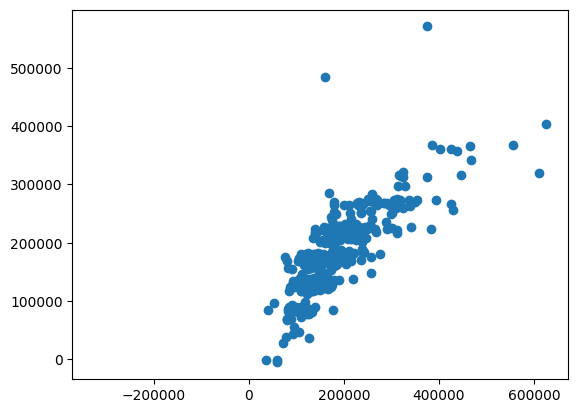

In [15]:
predictions = linear_regression.predict(x_test)

plt.scatter(y_test, predictions)
plt.hist(y_test - predictions)

### Performance evaluation

In [16]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions)

2346061740.7311306